# Load Models

In [4]:
import spacy
import pandas as pd

# Charger le modèle pré-entraîné
nlp = spacy.load("en_core_web_sm")

### Load Data

In [5]:
# Lire le CSV
df = pd.read_csv("/app/notebooks/data/ner_dataset.csv", encoding = "ISO-8859-1", usecols=['Sentence #','Word','POS','Tag'])

print(df.head())

    Sentence #           Word  POS Tag
0  Sentence: 1      Thousands  NNS   O
1          NaN             of   IN   O
2          NaN  demonstrators  NNS   O
3          NaN           have  VBP   O
4          NaN        marched  VBN   O


### Group dataset by sentences and sort it

In [6]:
df['Sentence #'].ffill(inplace=True)

df['Word'] = df['Word'].astype(str)

sentences = df.groupby('Sentence #')['Word'].apply(" ".join).reset_index()
sentences['Sentence_num'] = sentences['Sentence #'].str.extract('(\d+)').astype(int)

sentences = sentences.sort_values(by='Sentence_num').reset_index()

sentences.drop(columns=['Sentence_num', "index"], inplace=True)

print(sentences.head())

    Sentence #                                               Word
0  Sentence: 1  Thousands of demonstrators have marched throug...
1  Sentence: 2  Families of soldiers killed in the conflict jo...
2  Sentence: 3  They marched from the Houses of Parliament to ...
3  Sentence: 4  Police put the number of marchers at 10,000 wh...
4  Sentence: 5  The protest comes on the eve of the annual con...


### Load spacy model and train it

In [7]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Process sentences to extract entities
sentences['Entities'] = sentences['Word'].apply(lambda x: [(ent.text, ent.label_) for ent in nlp(x).ents])

print(sentences.head())

    Sentence #                                               Word  \
0  Sentence: 1  Thousands of demonstrators have marched throug...   
1  Sentence: 2  Families of soldiers killed in the conflict jo...   
2  Sentence: 3  They marched from the Houses of Parliament to ...   
3  Sentence: 4  Police put the number of marchers at 10,000 wh...   
4  Sentence: 5  The protest comes on the eve of the annual con...   

                                            Entities  
0  [(Thousands, CARDINAL), (London, GPE), (Iraq, ...  
1                 [(Stop the Bombings, WORK_OF_ART)]  
2  [(the Houses of Parliament, ORG), (Hyde Park, ...  
3         [(10,000, CARDINAL), (1,00,000, CARDINAL)]  
4  [(the eve, DATE), (annual, DATE), (Britain, GP...  


In [8]:
# Extract all entity types and values
entity_types = []
entity_values = []

for _, row in sentences.iterrows():
    for entity in row['Entities']:
        entity_values.append(entity[0])
        entity_types.append(entity[1])

# Convert lists to Series for easier value counting
entity_types_series = pd.Series(entity_types)
entity_values_series = pd.Series(entity_values)


In [9]:
# Count the occurrence of each entity type
entity_type_counts = entity_types_series.value_counts()
print(entity_type_counts)

GPE            36865
DATE           24474
NORP           18743
PERSON         17210
ORG            16864
CARDINAL       13843
LOC             2526
ORDINAL         2018
MONEY           1404
PERCENT         1081
EVENT            890
TIME             827
QUANTITY         693
FAC              603
PRODUCT          304
WORK_OF_ART      298
LAW               75
LANGUAGE          71
Name: count, dtype: int64


### Plot Data For visualization

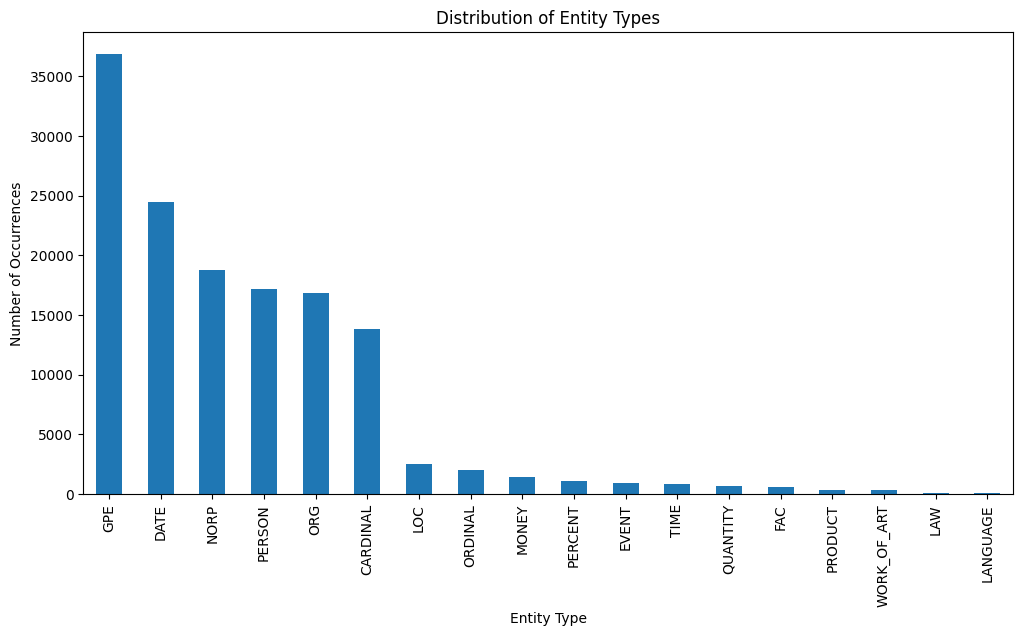

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt

# Plotting entity type distribution
entity_type_counts.plot(kind='bar', figsize=(12,6))
plt.title('Distribution of Entity Types')
plt.ylabel('Number of Occurrences')
plt.xlabel('Entity Type')
plt.show()
plt.savefig('./entity_distribution.png')

U.S.                 3571
two                  1968
Iraq                 1685
Iran                 1295
Tuesday              1277
Thursday             1204
Monday               1147
Wednesday            1147
Friday               1145
Iraqi                1106
Sunday               1043
Afghanistan          1037
Saturday             1032
Israeli              1024
the United States    1018
China                 974
first                 969
Israel                950
Palestinian           925
Bush                  922
Name: count, dtype: int64


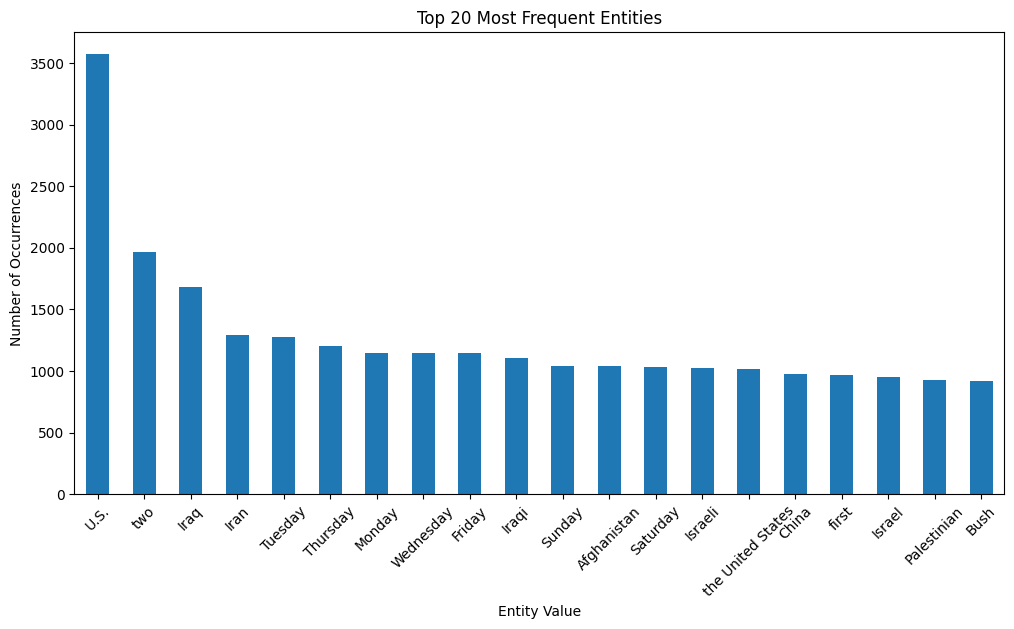

<Figure size 640x480 with 0 Axes>

In [11]:
# Count the occurrence of each entity value
entity_value_counts = entity_values_series.value_counts()

# Display the top 20 most frequent entities
print(entity_value_counts.head(20))

# Plotting the top entity values
entity_value_counts.head(20).plot(kind='bar', figsize=(12,6))
plt.title('Top 20 Most Frequent Entities')
plt.ylabel('Number of Occurrences')
plt.xlabel('Entity Value')
plt.xticks(rotation=45)
plt.show()
plt.savefig('./frequence.png')